In [ ]:
#Import Csv File

import requests

url = "https://drive.google.com/uc?export=download&id=1ISCZVoFKG1SCKT-82VrwC5rTaoCBgabO"

response = requests.get(url)
with open("environmental_data.csv", "wb") as file:
    file.write(response.content)
file_path = "/content/environmental_data.csv" # Fixed indentation
data = pd.read_csv(file_path)

import pandas as pd

data = pd.read_csv("environmental_data.csv")
print(data.head())



   Temperature  Humidity  Pressure
0           23        63       947
1           39        87      1073
2            8         8       941
3           46        50       930
4           10       100      1083


In [ ]:
#Analyzing

print(data.info())
print(data.describe())
print(data["Temperature"].mean())
print(data['Humidity'].max())
print(data.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype
---  ------       --------------  -----
 0   Temperature  20 non-null     int64
 1   Humidity     20 non-null     int64
 2   Pressure     20 non-null     int64
dtypes: int64(3)
memory usage: 608.0 bytes
None
       Temperature   Humidity     Pressure
count    20.000000   20.00000    20.000000
mean     25.100000   51.30000   991.500000
std      14.322966   30.59945    59.946028
min      -2.000000    8.00000   906.000000
25%      13.750000   26.25000   944.000000
50%      22.000000   47.00000   993.000000
75%      37.500000   77.75000  1036.250000
max      46.000000  100.00000  1083.000000
25.1
100
Temperature    0
Humidity       0
Pressure       0
dtype: int64


In [ ]:
#Data Visualization
!pip install bokeh


In [ ]:
#Line Graph

import pandas as pd
from bokeh.plotting import figure, show
from bokeh.io import output_notebook

# Create a Bokeh line graph
# Assuming 'Temperature' and 'Humidity' are columns in your data
bokeh_line = figure(title="Bokeh Line Graph",
                    x_axis_label="Temperature",
                    y_axis_label="Humidity",
                    width=800,
                    height=400)

# Plot the line graph using the selected columns
# Convert range object to a list for serialization:
bokeh_line.line(list(range(len(data))), data['Humidity'], line_width=2, color="blue")

# Show the plot
output_notebook()  # For Jupyter Notebook environments
show(bokeh_line)

In [ ]:
!pip install matplotlib seaborn

Index(['Temperature', 'Humidity', 'Pressure'], dtype='object')


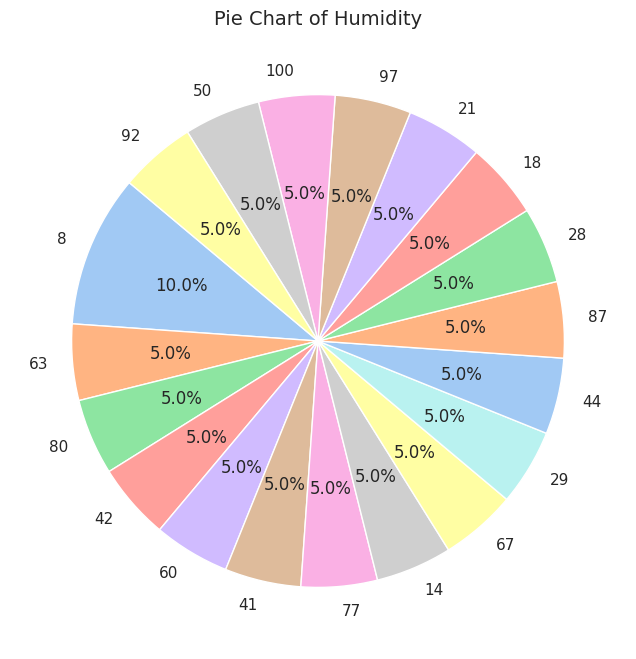

In [ ]:
#Pie Graph

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Print the available columns to check for suitable column for pie chart
print(data.columns)

# Choose a column for the pie chart
# Replace 'suitable_column' with an actual column name from the printed list
# This column should be categorical or have a limited number of unique values
suitable_column = 'Humidity'  # Replace with a suitable column name

# Create pie chart data
pie_data = data[suitable_column].value_counts()

# Apply Seaborn style for visualization
sns.set_theme(style="whitegrid")
plt.figure(figsize=(8, 8))

# Create the pie chart
plt.pie(pie_data, labels=pie_data.index, autopct='%1.1f%%', startangle=140,
        colors=sns.color_palette("pastel", len(pie_data)))
plt.title(f"Pie Chart of {suitable_column}", fontsize=14)
plt.show()

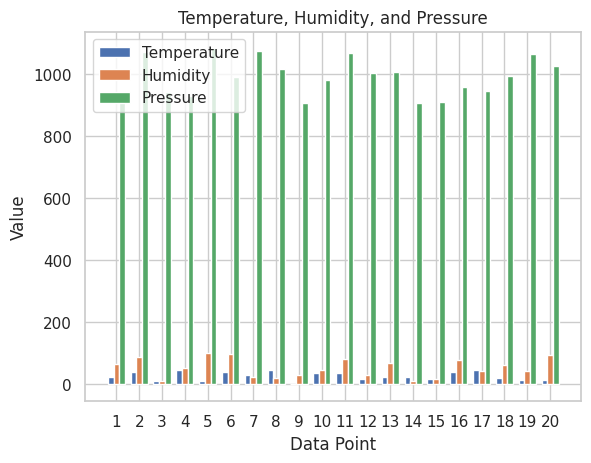

In [ ]:
#Bar Plot
import matplotlib.pyplot as plt
import numpy as np # Import numpy

# Data
temperature = [23, 39, 8, 46, 10, 39, 29, 46, -2, 35, 34, 14, 21, 21, 14, 37, 45, 18, 12, 13]
humidity = [63, 87, 8, 50, 100, 97, 21, 18, 28, 44, 80, 29, 67, 8, 14, 77, 41, 60, 42, 92]
pressure = [947, 1073, 941, 930, 1083, 991, 1074, 1018, 906, 982, 1068, 1005, 1007, 906, 910, 958, 945, 995, 1064, 1027]

# Create a figure and axes
fig, ax = plt.subplots()

# Create bar plots for each variable
x = range(len(temperature))
width = 0.25

rects1 = ax.bar(x, temperature, width, label='Temperature')
# Convert x to a NumPy array to enable element-wise addition with 'width'
rects2 = ax.bar(np.array(x) + width, humidity, width, label='Humidity')
rects3 = ax.bar(np.array(x) + 2*width, pressure, width, label='Pressure')

# Add labels and title
ax.set_xlabel('Data Point')
ax.set_ylabel('Value')
ax.set_title('Temperature, Humidity, and Pressure')
ax.set_xticks(np.array(x) + width) # Also adjust the x-ticks for centering
ax.set_xticklabels(range(1, len(temperature) + 1))
ax.legend()

# Show the plot
plt.show()